In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read data frame from web location with Unnamed: 0 as index column
link = 'https://cocl.us/datascience_survey_data'

df = pd.read_csv(link, index_col = 'Unnamed: 0')

In [3]:
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


## Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.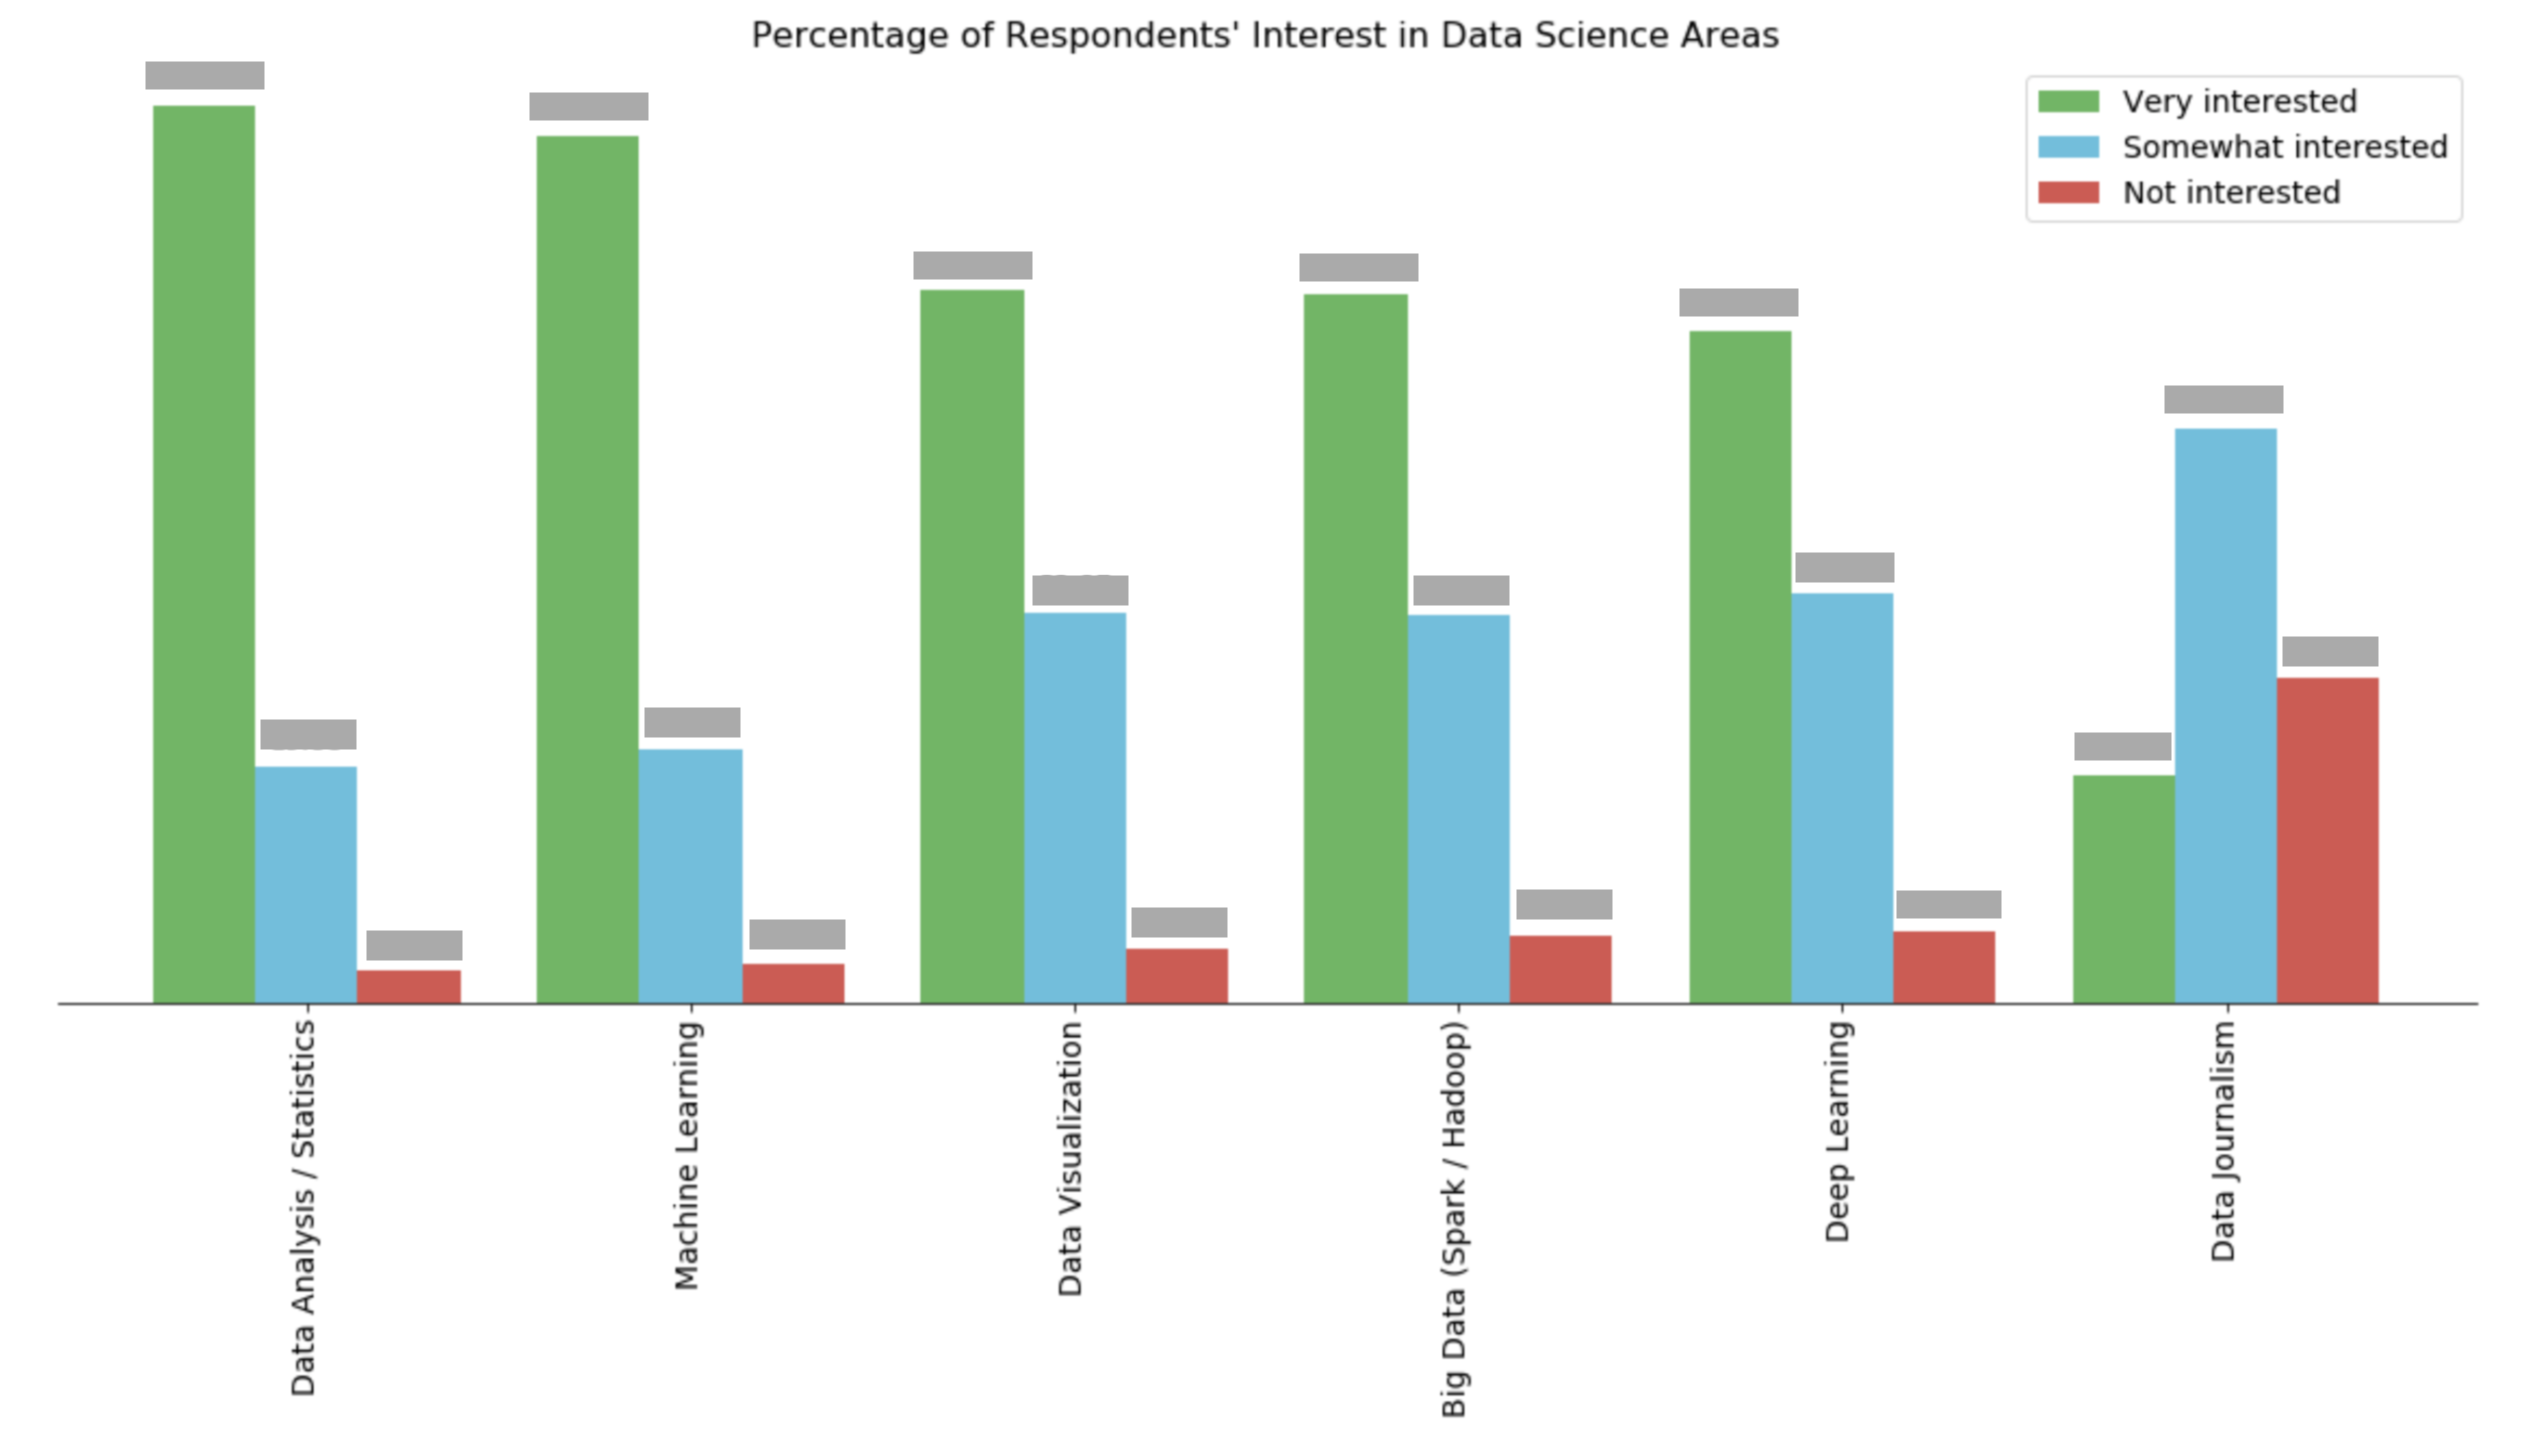

## Question - To create bar chart, you can follow the following steps:##
* Sort the data frame in descending order of Very interested
* Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places. (I will use total collumn instead).
* Use a figure size of (20,8), bar width of 0,8
* use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars
* use font size 14 for the bar labels, percentages, and legend
* use font size 16 for the title
* display the percentages above the bars as shown above, and remove the left, top, and right borders




In [4]:
#Create new total column in order to find percentages for each value
df['total'] = df.sum(axis=1)
df

,Very interested,Somewhat interested,Not interested,total
Big Data (Spark / Hadoop),1332,729,127,2188
Data Analysis / Statistics,1688,444,60,2192
Data Journalism,429,1081,610,2120
Data Visualization,1340,734,102,2176
Deep Learning,1263,770,136,2169
Machine Learning,1629,477,74,2180


In [5]:
#create values with the percentages by dividing values in the cell with total

df['Very_interested'] = round(df['Very interested'] / df['total'] * 100, 2)
df['Somewhat_interested'] = round(df['Somewhat interested'] / df['total'] * 100, 2)
df['Not_interested'] = round (df['Not interested'] / df['total'] * 100, 2)


In [6]:
df

,Very interested,Somewhat interested,Not interested,total,Very_interested,Somewhat_interested,Not_interested
Big Data (Spark / Hadoop),1332,729,127,2188,60.88,33.32,5.80
Data Analysis / Statistics,1688,444,60,2192,77.01,20.26,2.74
Data Journalism,429,1081,610,2120,20.24,50.99,28.77
Data Visualization,1340,734,102,2176,61.58,33.73,4.69
Deep Learning,1263,770,136,2169,58.23,35.50,6.27
Machine Learning,1629,477,74,2180,74.72,21.88,3.39


In [7]:
#drop unnecessary columns
df.drop(['Very interested', 'Somewhat interested', 'Not interested', 'total'], axis=1, inplace=True)
df


,Very_interested,Somewhat_interested,Not_interested
Big Data (Spark / Hadoop),60.88,33.32,5.80
Data Analysis / Statistics,77.01,20.26,2.74
Data Journalism,20.24,50.99,28.77
Data Visualization,61.58,33.73,4.69
Deep Learning,58.23,35.50,6.27
Machine Learning,74.72,21.88,3.39


In [8]:
#sort in descending order by the Very_interested
df.sort_values('Very_interested', ascending=False, inplace=True)
df

,Very_interested,Somewhat_interested,Not_interested
Data Analysis / Statistics,77.01,20.26,2.74
Machine Learning,74.72,21.88,3.39
Data Visualization,61.58,33.73,4.69
Big Data (Spark / Hadoop),60.88,33.32,5.80
Deep Learning,58.23,35.50,6.27
Data Journalism,20.24,50.99,28.77


Rectangle(xy=(1, 0), width=1666.5, height=20, angle=0)
Rectangle(xy=(1667.5, 0), width=1666.5, height=9, angle=0)
Rectangle(xy=(3334, 0), width=1666.5, height=6, angle=0)
Rectangle(xy=(5000.5, 0), width=1666.5, height=5, angle=0)
Rectangle(xy=(6667, 0), width=1666.5, height=5, angle=0)
Rectangle(xy=(8333.5, 0), width=1666.5, height=5, angle=0)


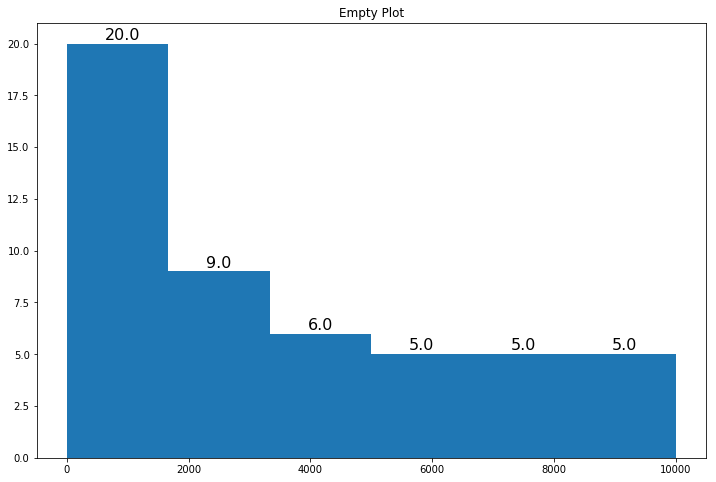

In [9]:
#practice with patches in object oriented matplotlib API in order to understand code in the assignment bellow
x = np.linspace(1, 100, 50)
y = x**2
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('Empty Plot')
ax.hist(y, bins=6)

for p in ax.patches:
   print(p)
    
for p in ax.patches:
    ax.annotate(p.get_height(), 
               (p.get_x() + p.get_width()/2.7, p.get_height() + 0.2), 
                fontsize=16)


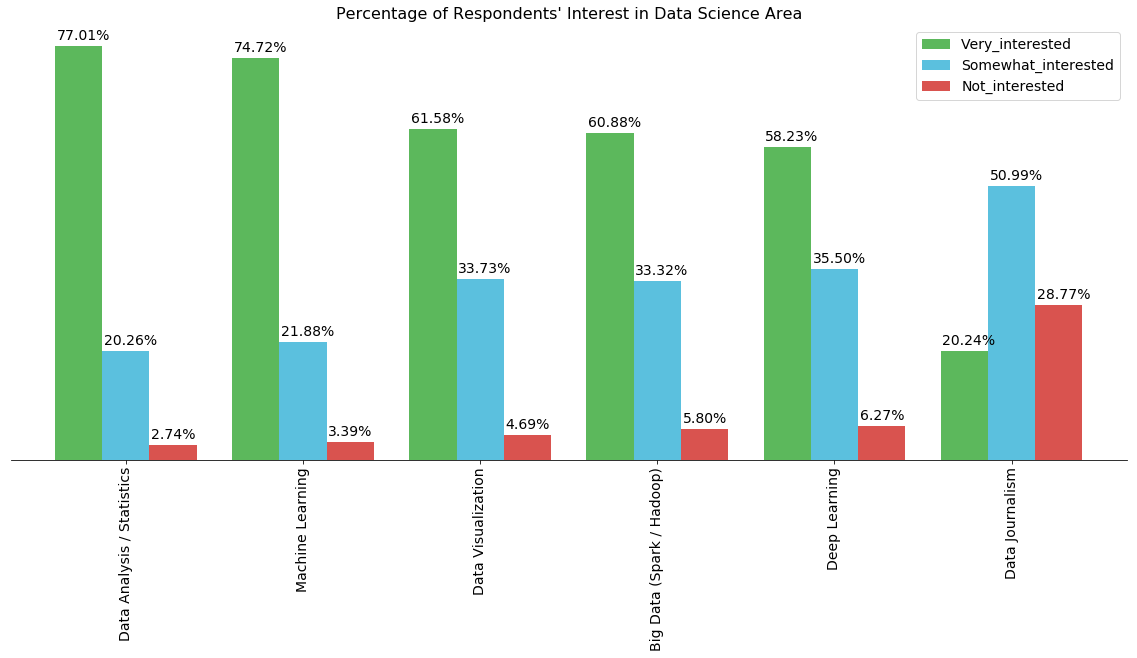

In [10]:
ax = df.plot(kind='bar', width=0.8,
            figsize=(20, 8),
            color=['#5cb85c', '#5bc0de', '#d9534f'])

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
ax.set_title("Percentage of Respondents' Interest in Data Science Area", fontsize=16)

#for p in ax.patches:
#   print(p)
    
for p in ax.patches:
    ax.annotate('{:.2%}'.format(p.get_height() / 100),
               (p.get_x() + 0.01, p.get_height() + 1.1),
               fontsize=14)

In [11]:
# I will do the same thing as above but with the division of the cells with 2233 in order to get percentages
#read data frame from web location with Unnamed: 0 as index column
link = 'https://cocl.us/datascience_survey_data'

df1 = pd.read_csv(link, index_col = 'Unnamed: 0')

In [12]:
df1.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [13]:
df1 = round((df1/2233) * 100, 2)
df1.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),59.65,32.65,5.69
Data Analysis / Statistics,75.59,19.88,2.69
Data Journalism,19.21,48.41,27.32
Data Visualization,60.01,32.87,4.57
Deep Learning,56.56,34.48,6.09


In [14]:
df1.sort_values('Very interested', ascending=False, inplace=True)
df1

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


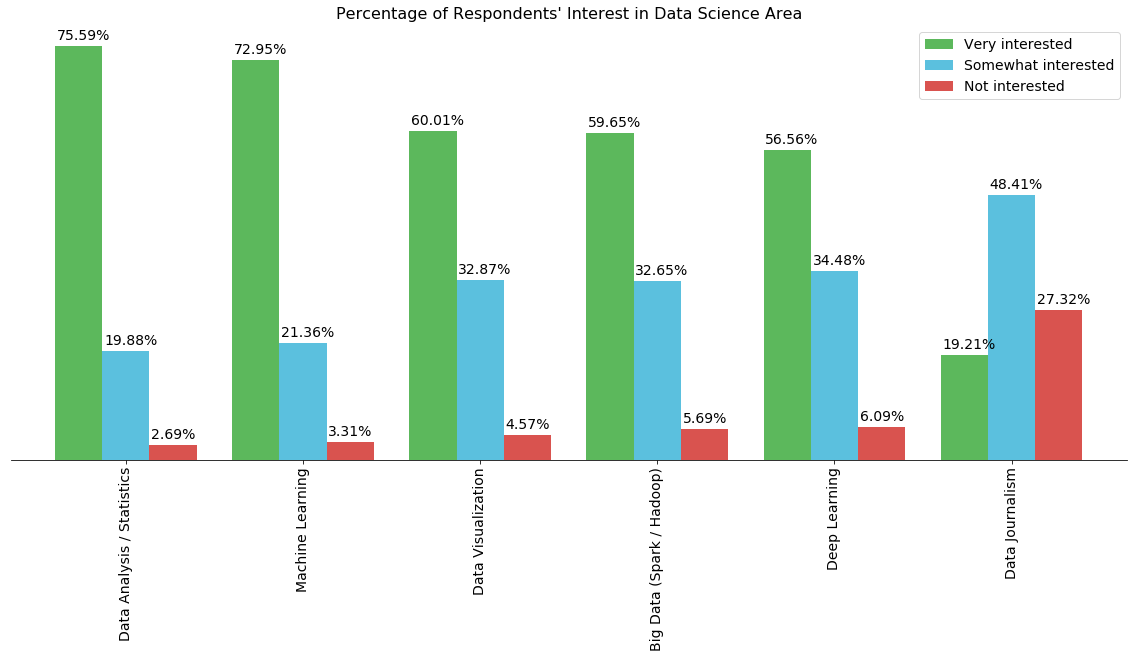

In [15]:
#requirements in the assignment was to divide by 2233 to get percentages but the right way to get percentages is like above,
#to find total column and divide by total, this is just for the assignment
ax = df1.plot(kind='bar', width=0.8,
            figsize=(20, 8),
            color=['#5cb85c', '#5bc0de', '#d9534f'])

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
ax.set_title("Percentage of Respondents' Interest in Data Science Area", fontsize=16)

#for p in ax.patches:
#   print(p)
    
for p in ax.patches:
    ax.annotate('{:.2%}'.format(p.get_height() / 100),
               (p.get_x() + 0.01, p.get_height() + 1.1),
               fontsize=14)

## In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

In [16]:
link1 = 'https://cocl.us/sanfran_crime_dataset'

df_sf = pd.read_csv(link1)
df_sf.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [17]:
df_sf.shape

(150500, 13)

## Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe that represents the total number of crimes in each neighborhood.

In [18]:
df_new = df_sf['PdDistrict'].value_counts().to_frame().reset_index()
df_new.rename(columns={'index': 'Neighborhood', 'PdDistrict':'Count'}, inplace=True)
df_new

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [19]:
#I have saved both DF to csv on cloud in order to have them in case link is not working
df_sf.to_csv('sf.csv')
df.to_csv('data_science_interest.csv')

In [20]:
#It is possible to do the same thing with group by method
df_sf.groupby('PdDistrict').DayOfWeek.count().sort_values(ascending=False)

PdDistrict
SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: DayOfWeek, dtype: int64

### As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

### For the map, make sure that:

* it is centred around San Francisco,
* you use a zoom level of 12,
* you use fill_color = 'YlOrRd',
* you define fill_opacity = 0.7,
* you define line_opacity=0.2, and,
* you define a legend and use the default threshold scale.

If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:
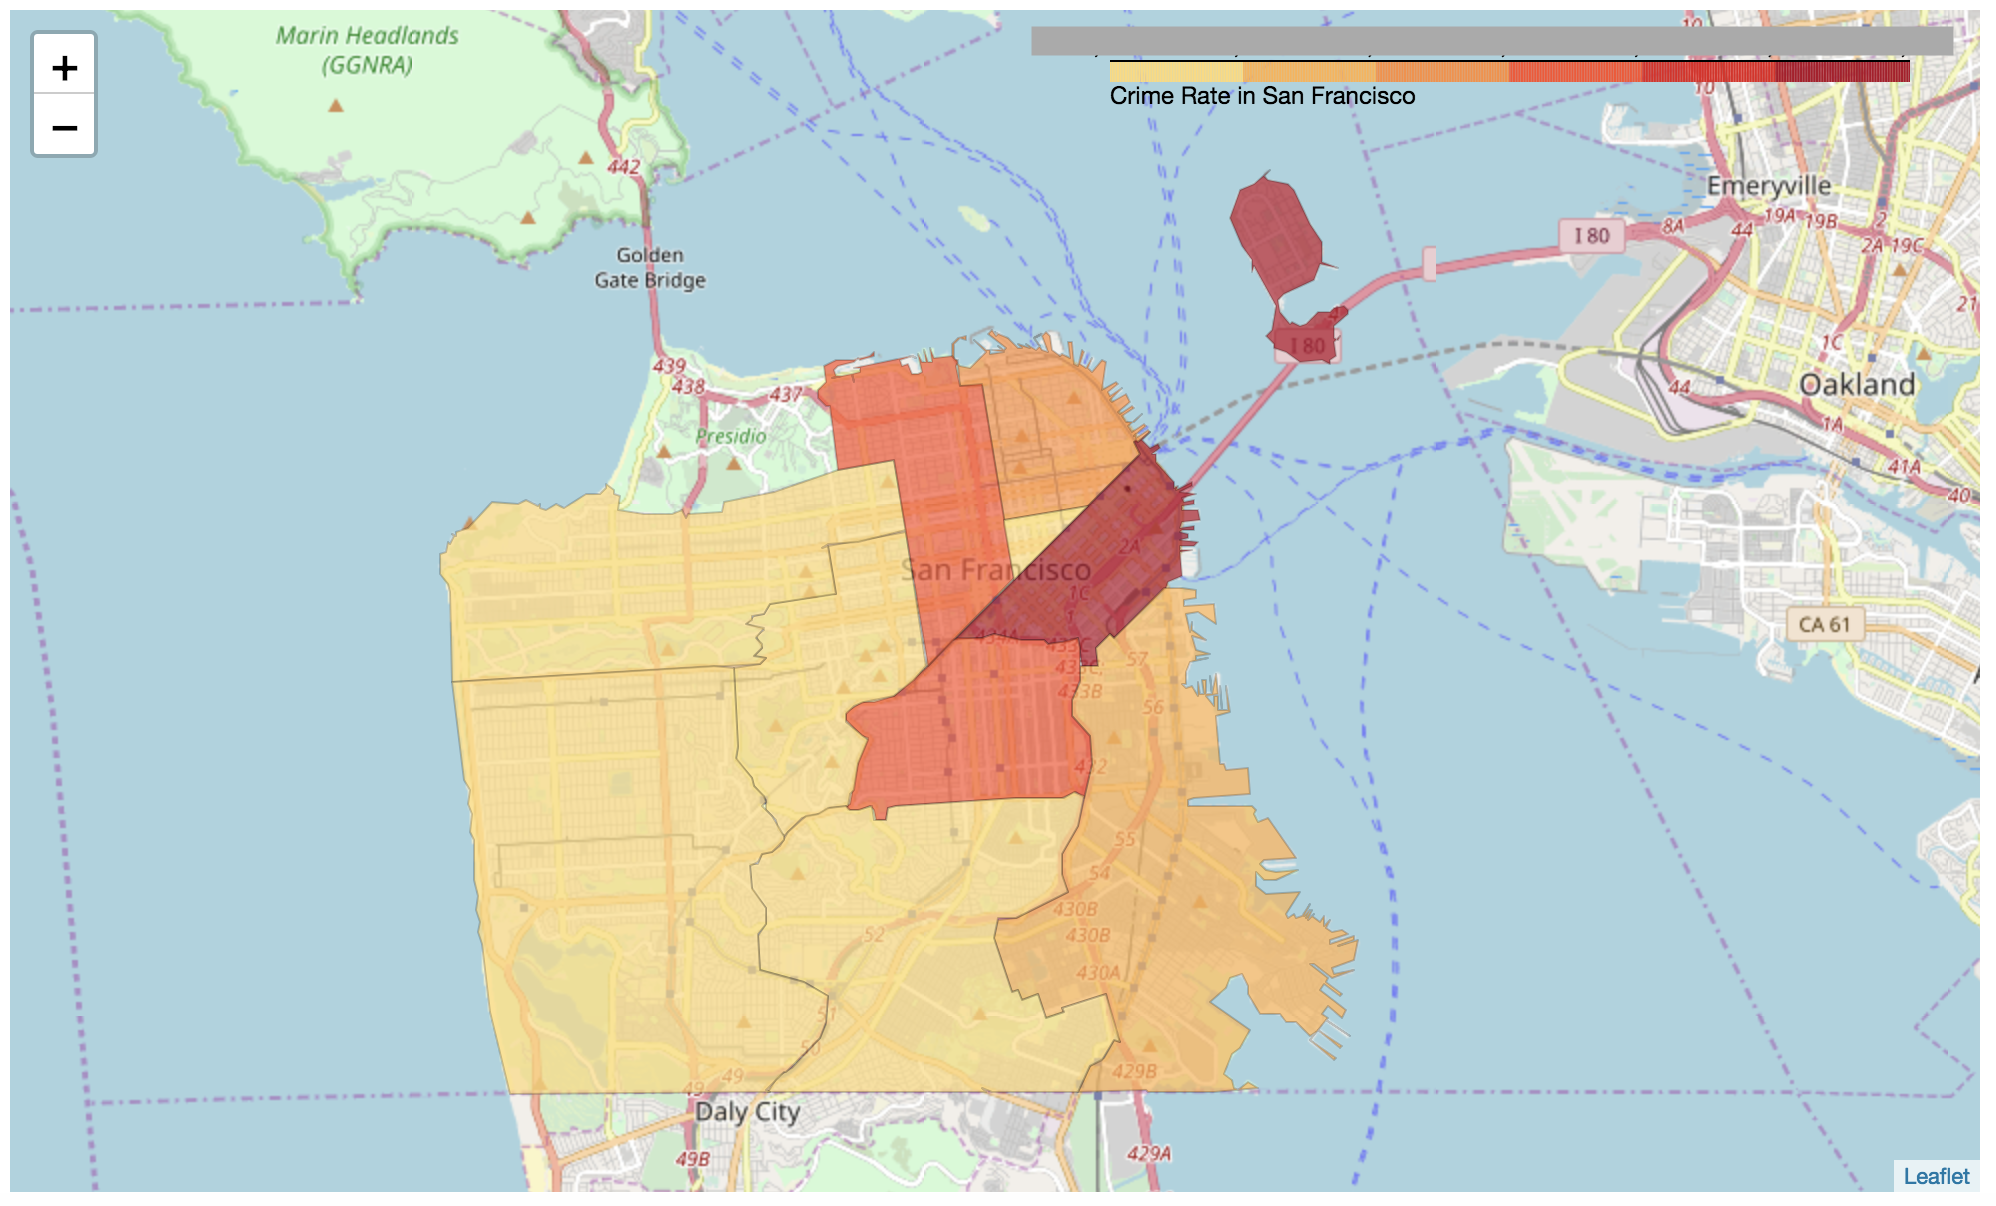


In [21]:
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [22]:
df_new.head()

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303


In [23]:
df_sf.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [24]:
#Finding x and y coordinates for the central San Franciscto that will be used in plot
sf = df_sf.loc[df_sf.PdDistrict == 'CENTRAL', ['Y', 'X']].head(1)
sf = sf.values.flatten()
sf = list(sf)
sf

[37.791642982384, -122.40090869888999]

In [25]:
threshold_scale = np.linspace(df_new['Count'].min(),
                             df_new['Count'].max(),
                             6, dtype=int).tolist()
threshold_scale

[8699, 12648, 16597, 20546, 24495, 28445]

In [26]:
threshold_scale[-1] = threshold_scale[-1] + 1
threshold_scale

[8699, 12648, 16597, 20546, 24495, 28446]

In [28]:
sf_geo = 'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = sf, zoom_start=12)
sf_map.choropleth(geo_data = sf_geo, 
                  data = df_new, 
                  columns = ['Neighborhood', 'Count'],
                  key_on = 'feature.properties.DISTRICT',
                  threshold_scale=threshold_scale,
                  fill_color = 'YlOrRd', 
                  fill_opacity = 0.7, 
                  line_opacity = 0.2,
                  legend_name = 'Crime Rate in San Francisco')
sf_map